<a href="https://colab.research.google.com/github/yogapatangga/MachineLearningTasks/blob/main/1stWeekTasks/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression
## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the 50 Startup dataset and display the first few rows

In [2]:
dataset = pd.read_csv('50_Startups.csv')
print(dataset.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


## Feature Engineering

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X = dataset.drop("Profit", axis=1)  # Features
y = dataset["Profit"]    # Target
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), [3])  # State is the categorical feature
], remainder='passthrough')
X = ct.fit_transform(X)

## Splitting the dataset into the Training set and Test set (70:30)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training the Multiple Linear Regression model on the Training set

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

## Predicting the Test set results

In [6]:
y_pred = model.predict(X_test)

## Visualising the Test set results

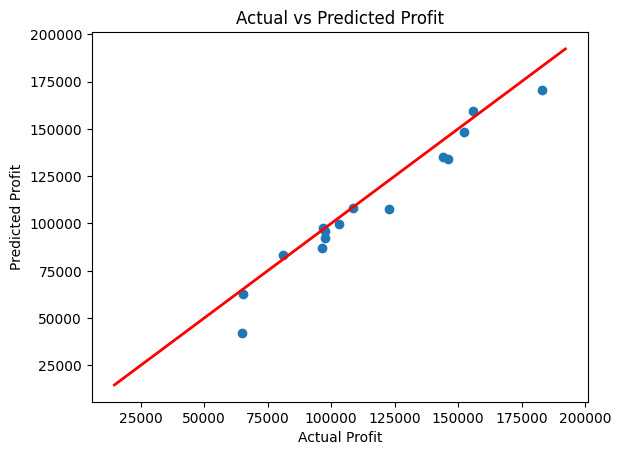

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Diagonal line
plt.show()